#  مقدمه

توی این استایل‌گاید، قراره با هم یاد بگیریم چطور پروژه‌های Django رو
طوری طراحی کنیم که **هم تمیزتر، هم مقیاس‌پذیرتر و هم لذت‌بخش‌تر** باشن.

ایده‌ی اصلی اینه که بجای اینکه همه‌چیز رو توی View یا Model بنویسیم،
بیایم پروژه رو به چند **لایه‌ی منطقی (Logic Layers)** تقسیم کنیم،
که هرکدوم وظیفه‌ی خودش رو داره و کدها از هم **جدا و قابل تست** می‌شن.

---

## هدف نهایی
قراره به جایی برسیم که:

- بدونیم هر بخش از منطق برنامه کجا باید نوشته بشه.
- بتونیم با خیال راحت تست بنویسیم و خطاها رو هندل کنیم.
- وظیفه‌ی هر لایه (Service, Selector, API, Serializer و ...) مشخص باشه.
- اگه یه بخشی از سیستم بزرگ شد، بتونیم راحت جداش کنیم و مدیریت کنیم.
- کدها هم برای خودمون، هم برای هم‌تیمی‌هامون **خوانا، امن و توسعه‌پذیر** باشن.

---

##  ساختار کلی این راهنما

در ادامه قراره با این مباحث آشنا بشیم:

1. **API Layer** – نقطه‌ی ورود درخواست‌ها، مسئول دریافت و پاسخ HTTP.
2. **Service Layer** – مسئول منطق اصلی کسب‌وکار (Business Logic).
3. **Selector Layer** – لایه‌ی مخصوص خواندن داده از دیتابیس.
4. **Serializer Layer** – آماده‌سازی داده‌ها برای API، با prefetch و caching هوشمند.
5. **URLs Structure** – سازماندهی مسیرها به روش قابل نگهداری در پروژه‌های بزرگ.
6. **Settings Structure** – تقسیم تنظیمات Django و ۳rd partyها برای محیط‌های مختلف.
7. **Error Handling** – چطور خطاها رو یک‌دست و قابل پیش‌بینی مدیریت کنیم.
8. **Celery Integration** – اجرای کارهای پس‌زمینه و Async به روش تمیز.
9. **Testing Strategy** – چطور هر لایه رو جداگانه و مطمئن تست کنیم.

---

در نهایت، هدف ما اینه که:
> «کدی بنویسیم که هم زیبا باشه، هم قابل فهم، هم انعطاف‌پذیر —
> و موقع خوندنش حس نکنیم تو جهنم افتادیم »


#  Django Styleguide — Explained My Way

این خلاصه‌ایه از **Django Styleguide** نوشته‌ی HackSoft — ولی به زبون خودمونی‌تر.

اینجا با نتیجه‌ی سال‌ها پروژه‌های کوچیک و بزرگ طرفی و سه تا راه داری برای برخورد باهاش:

1. مو به مو ازش پیروی کن.
2. هرچی برات معنی‌دار بود انتخاب کن .
3. یا کلاً بی‌خیالش شو — ولی اگه گزینه‌ی سه‌ای… چرا اصلاً اینجایی؟

---

##  ایده‌ی اصلی

هرچی ابزار و امکانات پروژه بیشتر بشن، نیازت به ظرف‌های منظم‌تر هم بیشتر می‌شه.
هرچی پروژه بزرگ‌تر، لایه‌ها هم باید واضح‌تر باشن.

تو Django منطق پروژه (Business Logic) باید داخل اینا باشه:

- **Services** → توابعی که بیشتر کار نوشتن توی دیتابیس رو انجام میدن.
- **Selectors** → توابعی که بیشتر کار خوندن از دیتابیس رو می‌کنن.
- **Model Properties** (در موارد خاص).
- **متد `clean()`** برای اعتبارسنجی اضافه (در موارد خاص).

و نباید داخل اینا باشه:

- APIها و Viewها
- Serializerها و Formها
- تگ‌های Form
- متد `save()` مدل
- Custom Managerها یا QuerySetها
- Signalها

---

## ️ Model Property یا Selector؟

- اگه Property مربوط به چند رابطه (multi-relation) باشه → ببرش تو Selector.
- اگه Property پیچیده‌ست و ممکنه باعث **N + 1 query problem** بشه → باز هم Selector.

هدف کلی:
**"Separate Concerns"** — یعنی هر بخش فقط کار خودش رو انجام بده تا بشه راحت‌تر نگهش داشت و تستش کرد.

---

## 🤔 چرا نه View یا Serializer؟

چون وقتی منطق رو پخش کنی بین View و Serializer و Form،
کد تیکه‌تیکه می‌شه، جریان دیتا گم می‌شه،
و برای یه تغییر ساده باید بری دل abstractionها ببینی چی به چیه.

بله، generic View و serializerها برای CRUD ساده عالی‌ان،
ولی وقتی از مسیر خوش و خرم CRUD خارج شدی، وارد باس‌فایت می‌شی
اون‌جاست که اوضاع شلخته می‌شه و کم‌کم یه **لگسی ریپو** ازت جا می‌مونه.

پس این Styleguide اومده تا برات **جعبه‌** تعریف کنه:
تا بتونی منطق رو توی جای درستش بچینی، برای پروژه‌ی خودت.

---

##  Core در برابر Interface

رفتار اصلی برنامه (business logic) نباید قاطی لایه‌ی ارتباطش با بیرون بشه.
API، CLI، management command — اینا فقط Interface ان.
مرز بین **core** و **interface** باید واضح باشه.
بعضی وقتا قاطی می‌شن، ولی داشتن این مرز یعنی پروژه‌ات تمیز، تست‌پذیر و قابل‌گسترشه.

---

##  چرا نه Custom Manager یا QuerySet؟

ایده‌ی بدی نیست، اما کافی نیست.

ممکنه Manager/QuerySet بهتر برای مدل بسازی،
ولی نمی‌تونی کل منطق پروژه رو اونجا بچپونی، چون:

- منطق پروژه همیشه دقیقاً با مدل یکی نیست.
- معمولاً بین چند تا مدل پخش می‌شه (A و B و C و D و …).
- بعضی وقتا باید با سرویس‌های خارجی کار کنه — و اونجا جاش توی Manager نیست.

پس منطق رو از لایه‌ی دیتا جدا کن و بذار توی **Service Layer**.

Service ممکنه تابع، کلاس، یا حتی ماژول باشه — هرچی منطقی‌تره برای مورد تو.

Manager و QuerySet ابزارهای قدرتمندن،
ولی کارشون فقط ارائه‌ی **interface بهتر** برای مدل‌هاست، نه جای منطق اصلی.

---

## ⚠️ چرا نه Signal؟

Signalها ابزار خوبی‌ان برای **چیزایی که نباید همدیگه رو بشناسن**
ولی می‌خوای وصلشون کنی — مثلاً برای invalidate کردن cache.

اما اگه منطق اصلی رو ببری اونجا،
اتصال‌ها **پنهون و غیرقابل‌ردیابی** می‌شن.
در نتیجه، دیباگش به جهنم ختم می‌شه 🔥

بنابراین Signal فقط برای موارد خاص،
نه برای ساختار دادن به لایه‌ی domain/business.

---

##  خلاصه‌ی داستان

هرچی پروژه بزرگ‌تر، ساختار باید حرفه‌ای‌تر.
منطق رو بذار توی Service و Selector، نه توی View و Serializer.
Core رو از Interface جدا کن.
و لطفاً، لطفاً Signal رو فقط وقتی استفاده کن که واقعاً لازمه. 😅


# 🍪 Cookiecutter — پروژه رو با ساختار درست شروع کن

اوه، در ضمن...
بیشتر دردسرهای اول پروژه معمولاً سر **فولدر‌بندی و فایل‌منیجمنت** شروع می‌شن
ولی خدا رو شکر یه چیز آماده هست به اسم **Cookiecutter** که کارت رو راحت می‌کنه.

---

##  Cookiecutter چیه؟

یه ابزار برای ساختن **اسکلت اولیه پروژه** ـه.
به جای اینکه هر بار بری دستی فولدر بسازی و `settings.py` و `config` و `tests` رو از صفر درست کنی،
با یه دستور ساده برات یه ساختار حرفه‌ای و آماده می‌سازه.

مثلاً:

```bash
cookiecutter https://github.com/cookiecutter/cookiecutter-django


#  Model

مدل فقط باید مسئول **داده (Data Model)** باشه — نه چیز دیگه.
یعنی کاری به منطق (Business Logic)، API یا سایر لایه‌ها نداره.
مدل فقط باید تعریف کنه **چی ذخیره می‌کنیم** و **چطور ذخیره می‌کنیم**.

---

##  BaseModel

ما معمولاً از **تکرار کد** خوشمون نمیاد (شما هم احتمالاً همین‌طور ).
پس بهترین کار اینه که برای همه‌ی مدل‌ها **یه مدل پایه (Parent Model)** تعریف کنیم.

این مدل پایه، فیلدهایی رو نگه می‌داره که تقریباً همه‌ی مدل‌ها بهش نیاز دارن.
معمول‌ترینش هم ایناست:

- `created_at` → تاریخ ساخت
- `updated_at` → تاریخ آخرین تغییر

به این ترتیب لازم نیست توی هر مدل جداگانه این فیلدها رو تکرار کنیم.
کد تمیزتر، کوتاه‌تر و قابل‌نگهداری‌تر می‌مونه.



In [ ]:
from django.db import models
from django.utils import timezone


class BaseModel(models.Model):
    created_at = models.DateTimeField(db_index=True, default=timezone.now)
    updated_at = models.DateTimeField(auto_now=True)

    class Meta:
        abstract = True

 هر موقع هم مودل جدید خواستی فقط از `BaseModel` ارث بری کن

In [ ]:
class SomeModel(BaseModel):
    pass

# ✅ Validation — `clean()` & `full_clean()`
 گاهی نیازه که در مودل خود مطمعن بشیم که دیتایی که در حال ارسال ذخیره سازی هست درسته یا نه

In [ ]:
class Course(BaseModel):
    name = models.CharField(unique=True, max_length=255)
    start_date = models.DateField()
    end_date = models.DateField()

    def clean(self):
        if self.start_date >= self.end_date:
            raise ValidationError("End date cannot be before start date")


اینجا با متد `clean()` داریم مطمئن می‌شیم که داده‌ی اشتباه وارد دیتابیس نشه.
اما دقت کن! برای اینکه `clean()` صدا زده بشه باید قبل از `save()`،
یه بار `full_clean()` روی شیء اجرا بشه 👇

In [ ]:
def course_create(*, name: str, start_date: date, end_date: date) -> Course:
    obj = Course(name=name, start_date=start_date, end_date=end_date)

    obj.full_clean()  # اعتبارسنجی
    obj.save()        # ذخیره در دیتابیس

    return obj


این روش هم با Django Admin هماهنگه،
چون اونجا فرم‌ها خودشون `full_clean()` رو صدا می‌زنن.

---

## 📋 قانون کلی

✅ وقتی اعتبارسنجی فقط روی چند تا **فیلد ساده‌ی مدل** هست → توی `clean()` بنویس.
⚙️ وقتی اعتبارسنجی پیچیده‌ست یا نیاز به **داده از مدل‌های دیگه** داری → ببرش توی **service layer**.


#  Validation — Constraints

اگر بشه با Constraint انجامش داد، همیشه اون راه بهتره 👇
چون دیتابیس خودش جلوی داده‌ی اشتباه رو می‌گیره (حتی از بیرون Django).


In [ ]:
class Course(BaseModel):
    name = models.CharField(unique=True, max_length=255)
    start_date = models.DateField()
    end_date = models.DateField()

    class Meta:
        constraints = [
            models.CheckConstraint(
                name="start_date_before_end_date",
                check=Q(start_date__lt=F("end_date"))
            )
        ]


از Django 4.1 به بعد،
`full_clean()` حتی **constraints**‌ها رو هم چک می‌کنه 👀
پس به جای `IntegrityError`، `ValidationError` می‌گیری.

📚 [Docs](https://docs.djangoproject.com/en/4.1/ref/models/instances/#validating-objects)


#  Properties

گاهی لازمه مقدارهای ساده‌ی مشتق‌شده از فیلدها رو سریع بگیریم.
اونجا بهترین گزینه، `@property` هست.


In [ ]:
from django.utils import timezone

class Course(BaseModel):
    ...
    @property
    def has_started(self) -> bool:
        now = timezone.now()
        return self.start_date <= now.date()

    @property
    def has_finished(self) -> bool:
        now = timezone.now()
        return self.end_date <= now.date()


الان می‌تونی توی serializer یا template بنویسی:

```python
course.has_started
course.has_finished


#  Methods

متدهای مدل ابزار قدرتمندی هستن که می‌تونن روی properties ساخته بشن یا داده‌های مدل رو تغییر بدن.

---

## 🧩 مثال ساده

در این مثال، متد `is_within(self, x)` بررسی می‌کنه که آیا تاریخ `x` بین `start_date` و `end_date` هست یا نه.


In [ ]:
from django.core.exceptions import ValidationError
from django.utils import timezone
from datetime import date


class Course(BaseModel):
    name = models.CharField(unique=True, max_length=255)
    start_date = models.DateField()
    end_date = models.DateField()

    def clean(self):
        if self.start_date >= self.end_date:
            raise ValidationError("End date cannot be before start date")

    @property
    def has_started(self) -> bool:
        now = timezone.now()
        return self.start_date <= now.date()

    @property
    def has_finished(self) -> bool:
        now = timezone.now()
        return self.end_date <= now.date()

    def is_within(self, x: date) -> bool:
        return self.start_date <= x <= self.end_date


متد `is_within` نمی‌تونه property باشه چون نیاز به آرگومان داره، پس به‌صورت متد تعریف میشه.

---

## 🔁 مثال دوم: ست‌کردن چند مقدار با هم

گاهی وقتا وقتی یک attribute تغییر می‌کنه، باید attribute دیگه‌ای هم بر اساس اون آپدیت بشه.
در این مواقع می‌تونیم از یک متد استفاده کنیم.
اینجا چون `x` ورودی داره، دیگه property نیست، method حساب میشه.


In [ ]:
from django.utils.crypto import get_random_string
from django.conf import settings
from django.utils import timezone


class Token(BaseModel):
    secret = models.CharField(max_length=255, unique=True)
    expiry = models.DateTimeField(blank=True, null=True)

    def set_new_secret(self):
        now = timezone.now()
        self.secret = get_random_string(255)
        self.expiry = now + settings.TOKEN_EXPIRY_TIMEDELTA
        return self


با صدا زدن `set_new_secret()`، هر دو مقدار `secret` و `expiry` به‌درستی مقداردهی می‌شن.

---

## 📜 قانون کلی

✅ اگه مقدار جدید فقط از خود فیلدهای مدل حساب میشه → متد.
⚙️ اگه باید از مدل‌های دیگه داده بگیری یا محاسبه پیچیده‌ست → سرویس (Service).

---

# 🧪 Testing

مدل‌ها فقط وقتی تست نیاز دارن که منطق خاصی داشته باشن (مثل validation یا property یا method).


In [ ]:
from datetime import timedelta
from django.test import TestCase
from django.core.exceptions import ValidationError
from django.utils import timezone
from project.some_app.models import Course


class CourseTests(TestCase):
    def test_course_end_date_cannot_be_before_start_date(self):
        start_date = timezone.now()
        end_date = timezone.now() - timedelta(days=1)

        course = Course(start_date=start_date, end_date=end_date)

        with self.assertRaises(ValidationError):
            course.full_clean()


✅ نکات مهم:
- `full_clean()` بررسی می‌کنه که اعتبار داده‌ها درست باشه.
- نیازی نیست به دیتابیس وصل بشیم، چون فقط منطق مدل تست میشه → تست سریع‌تر میشه.


#  Services

سرویس‌ها جایی هستن که **منطق تجاری (Business Logic)** پروژه در اون‌ها قرار می‌گیره.
یعنی هر چیزی که به قوانین یا رفتار اصلی سیستم مربوطه — نه صرفاً ذخیره‌سازی یا نمایش داده.

لایه‌ی Service زبانی متناسب با **دامنه‌ی پروژه (Domain Language)** صحبت می‌کنه،
به دیتابیس و منابع خارجی دسترسی داره،
و می‌تونه با بخش‌های دیگه‌ی سیستم تعامل کنه.

##  جایگاه در ساختار پروژه

لایه‌ی Service معمولاً بین **View** و **Model** قرار می‌گیره:

[ Views ] → [ Services ] → [ Models ]

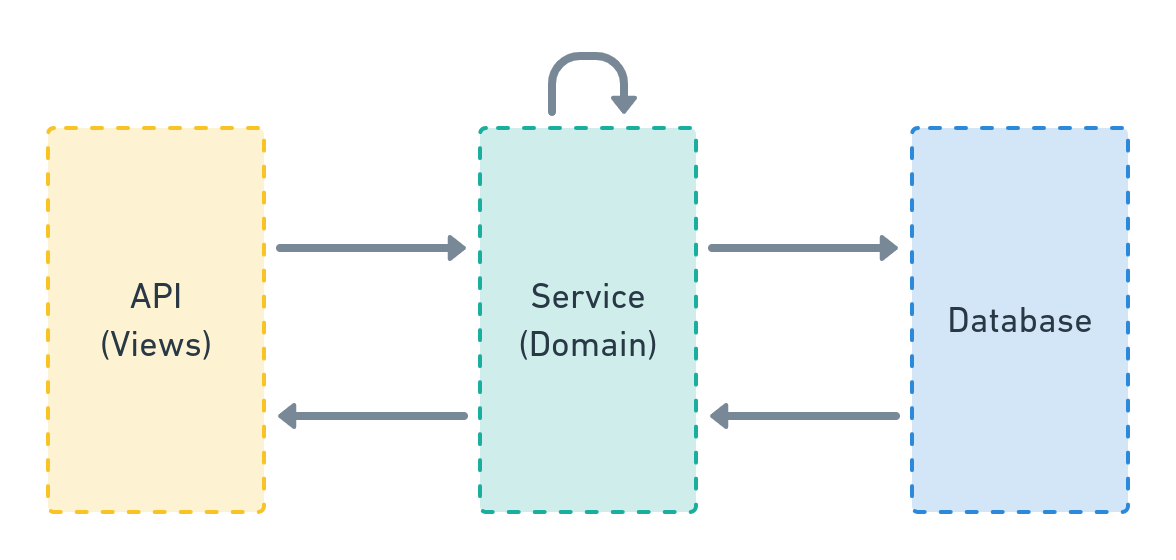

##  ساختار کلی Service

یک سرویس می‌تونه هرکدوم از اینا باشه:

- یک تابع ساده
- یک کلاس
- حتی یک ماژول کامل
- یا هر چیزی که **برای پروژه‌ت منطقی باشه**


##  معمول‌ترین حالت

در بیشتر موارد، سرویس‌ها فقط **توابع ساده** هستن که:

- داخل فایل `<your_app>/services.py` قرار می‌گیرن
- ورودی‌هاشون **keyword-only** هست (مگر اینکه فقط یه آرگومان نیاز داشته باشن)
- با **type hint** نوشته می‌شن، حتی اگه فعلاً از `mypy` استفاده نکنی
- با دیتابیس، فایل‌ها، APIها یا سرویس‌های دیگه ارتباط دارن
- منطق اصلی بیزینس رو انجام می‌دن — از ساخت ساده‌ی مدل‌ها گرفته تا عملیات پیچیده یا فراخوانی سرویس‌های خارجی

---

Example - function-based service

In [ ]:
def user_create(
    *,
    email: str,
    name: str
) -> User:
    user = User(email=email)
    user.full_clean()
    user.save()

    profile_create(user=user, name=name)
    confirmation_email_send(user=user)

    return user

Example - class-based service


In [ ]:
# https://github.com/HackSoftware/Django-Styleguide-Example/blob/master/styleguide_example/files/services.py


class FileStandardUploadService:
    """
    This also serves as an example of a service class,
    which encapsulates 2 different behaviors (create & update) under a namespace.

    Meaning, we use the class here for:

    1. The namespace
    2. The ability to reuse `_infer_file_name_and_type` (which can also be an util)
    """
    def __init__(self, user: BaseUser, file_obj):
        self.user = user
        self.file_obj = file_obj

    def _infer_file_name_and_type(self, file_name: str = "", file_type: str = "") -> Tuple[str, str]:
        file_name = file_name or self.file_obj.name

        if not file_type:
            guessed_file_type, encoding = mimetypes.guess_type(file_name)
            file_type = guessed_file_type or ""

        return file_name, file_type

    @transaction.atomic
    def create(self, file_name: str = "", file_type: str = "") -> File:
        _validate_file_size(self.file_obj)

        file_name, file_type = self._infer_file_name_and_type(file_name, file_type)

        obj = File(
            file=self.file_obj,
            original_file_name=file_name,
            file_name=file_generate_name(file_name),
            file_type=file_type,
            uploaded_by=self.user,
            upload_finished_at=timezone.now()
        )

        obj.full_clean()
        obj.save()

        return obj

    @transaction.atomic
    def update(self, file: File, file_name: str = "", file_type: str = "") -> File:
        _validate_file_size(self.file_obj)

        file_name, file_type = self._infer_file_name_and_type(file_name, file_type)

        file.file = self.file_obj
        file.original_file_name = file_name
        file.file_name = file_generate_name(file_name)
        file.file_type = file_type
        file.uploaded_by = self.user
        file.upload_finished_at = timezone.now()

        file.full_clean()
        file.save()

        return file



همونطور که تو کامنت گفته شد، ما این روش رو به دو دلیل اصلی استفاده می‌کنیم:

1. **Namespace**
   - یک فضای نام واحد داریم برای `create` و `update`.

2. **Reuse**
   - می‌خوایم از منطق `_infer_file_name_and_type` دوباره استفاده کنیم.

در ادامه، نمونه‌ای از نحوه‌ی استفاده‌ی این سرویس رو می‌بینیم:


In [ ]:
# https://github.com/HackSoftware/Django-Styleguide-Example/blob/master/styleguide_example/files/apis.py

class FileDirectUploadApi(ApiAuthMixin, APIView):
    def post(self, request):
        service = FileDirectUploadService(
            user=request.user,
            file_obj=request.FILES["file"]
        )
        file = service.create()

        return Response(data={"id": file.id}, status=status.HTTP_201_CREATED)

In [ ]:
@admin.register(File)
class FileAdmin(admin.ModelAdmin):
    # ... other code here ...
    # https://github.com/HackSoftware/Django-Styleguide-Example/blob/master/styleguide_example/files/admin.py

    def save_model(self, request, obj, form, change):
        try:
            cleaned_data = form.cleaned_data

            service = FileDirectUploadService(
                file_obj=cleaned_data["file"],
                user=cleaned_data["uploaded_by"]
            )

            if change:
                service.update(file=obj)
            else:
                service.create()
        except ValidationError as exc:
            self.message_user(request, str(exc), messages.ERROR)

 استفاده از classbased خیلی برای کار ها دارای جریان مفیده مثل کار های مولتی استیج

In [ ]:
# https://github.com/HackSoftware/Django-Styleguide-Example/blob/master/styleguide_example/files/services.py


class FileDirectUploadService:
    """
    This also serves as an example of a service class,
    which encapsulates a flow (start & finish) + one-off action (upload_local) into a namespace.

    Meaning, we use the class here for:

    1. The namespace
    """
    def __init__(self, user: BaseUser):
        self.user = user

    @transaction.atomic
    def start(self, *, file_name: str, file_type: str) -> Dict[str, Any]:
        file = File(
            original_file_name=file_name,
            file_name=file_generate_name(file_name),
            file_type=file_type,
            uploaded_by=self.user,
            file=None
        )
        file.full_clean()
        file.save()

        upload_path = file_generate_upload_path(file, file.file_name)

        """
        We are doing this in order to have an associated file for the field.
        """
        file.file = file.file.field.attr_class(file, file.file.field, upload_path)
        file.save()

        presigned_data: Dict[str, Any] = {}

        if settings.FILE_UPLOAD_STORAGE == FileUploadStorage.S3:
            presigned_data = s3_generate_presigned_post(
                file_path=upload_path, file_type=file.file_type
            )

        else:
            presigned_data = {
                "url": file_generate_local_upload_url(file_id=str(file.id)),
            }

        return {"id": file.id, **presigned_data}

    @transaction.atomic
    def finish(self, *, file: File) -> File:
        # Potentially, check against user
        file.upload_finished_at = timezone.now()
        file.full_clean()
        file.save()

        return file


نام‌گذاری سرویس‌ها به سلیقه‌ی شما بستگی داره، اما مهمه که **یکدست و قابل پیش‌بینی** باشه.

اگر به مثال قبلی نگاه کنیم، سرویس ما `user_create` نام داره.
الگوی پیشنهادی: `<entity>_<action>`.

1. **Namespace**
   - راحت می‌تونیم همه‌ی سرویس‌هایی که با `user_` شروع می‌شن رو پیدا کنیم.
   - همچنین می‌تونیم اون‌ها رو در یک ماژول جداگانه مثل `users.py` قرار بدیم.

2. **Greppability**
   - اگر بخوایم همه‌ی عملیات مرتبط با یک موجودیت خاص رو ببینیم، کافیه grep کنیم روی `user_`.

#  Modules

اگه یک اپ ساده‌ی Django داری و تعداد کمی سرویس داری، می‌تونی همه رو داخل یک فایل `services.py` نگه داری.

---

## ️ وقتی پروژه بزرگ میشه

وقتی سرویس‌ها زیاد شدن، بهتره `services.py` رو به یک **پکیج (فولدر) با زیرماژول‌ها** تبدیل کنی،
بسته به **ساب‌دامین‌ها** یا بخش‌های مختلفی که در اپ داری.

---

فرض کنیم یک اپ Authentication داریم:

- یک زیرماژول برای **JWT**
- یک زیرماژول برای **OAuth**

```text
services
├── __init__.py
├── jwt.py
└── oauth.py

#  Flavors of Service Modules

چند روش مختلف برای ساختاردهی سرویس‌ها وجود داره:

1. **Import-export dance**
   - می‌تونی داخل `services/__init__.py` همه‌ی سرویس‌ها رو ایمپورت کنی،
   - تا بتونی از هر جای پروژه، فقط با `from project.authentication.services import ...` دسترسی داشته باشی.

2. **Folder-module**
   - می‌تونی یک فولدر مثل `jwt/` بسازی و `__init__.py` داشته باشه،
   - و تمام کدهای مرتبط با JWT رو اونجا بذاری.

3. **Flexibility**
   - در نهایت، ساختار کاملاً به خودت بستگی داره.
   - اگه حس کردی وقتشه بازسازی و ریفکتور انجام بدی — همین کار رو بکن

#  Selectors

در بیشتر پروژه‌هامون، بین **پوش دادن (Push)** و **پول کشیدن (Pull)** داده‌ها از دیتابیس تفاوت قائل می‌شیم:

- 🧩 **Services** مسئول "Push" هستن — یعنی وارد کردن، تغییر دادن یا حذف داده‌ها در دیتابیس.
- 🔍 **Selectors** مسئول "Pull" هستن — یعنی واکشی و خواندن داده‌ها از دیتابیس.

به عبارتی، **Selectors** یک «زیرلایه» از سرویس‌ها هستن که تخصصش در گرفتن داده‌هاست.

اگه با این ایده خیلی ارتباط نمی‌گیری، هیچ اشکالی نداره — می‌تونی برای هر دو نوع عملیات فقط از سرویس‌ها استفاده کنی.

---

##  قواعد Selector

یک Selector دقیقاً از همان قوانین Service پیروی می‌کند:

- می‌تونه تابع، کلاس یا ماژول باشه.
- در `<your_app>/selectors.py` قرار می‌گیره.
- ورودی‌هاش باید شفاف و keyword-only باشن.
- خروجی معمولاً queryset یا object برمی‌گردونه.

---

In [ ]:
def user_list(*, fetched_by: User) -> Iterable[User]:
    user_ids = user_get_visible_for(user=fetched_by)

    query = Q(id__in=user_ids)

    return User.objects.filter(query)

#  Testing

از اون‌جایی که **Service Layer** منطق اصلی کسب‌وکار (Business Logic) رو در خودش داره،
بهترین نقطه برای نوشتن تست‌های دقیق و هدفمند هم هست.

---

##  قوانین کلی برای تست سرویس‌ها

اگر تصمیم گرفتی **service layer** رو با تست پوشش بدی، این چند قانون کلی رو در نظر بگیر:

1.  **تست‌ها باید تمام منطق کسب‌وکار رو به‌صورت کامل پوشش بدن.**
   یعنی تمام مسیرهای ممکن در تابع یا کلاس تست بشن.

2.  **تست‌ها باید به دیتابیس واقعی (در محیط تست) دسترسی داشته باشن.**
   یعنی داده بسازن، ذخیره کنن و دوباره بخونن.

3.  **هر چیزی که از پروژه خارج می‌شه باید Mock بشه.**
   مثل:
   - فراخوانی async taskها
   - درخواست به APIهای خارجی
   - ایمیل‌زدن یا پیام‌فرستادن

---

##  ساخت وضعیت مورد نیاز برای تست

برای ساخت حالت اولیه (state) مورد نیاز هر تست، می‌تونی از ترکیب روش‌های زیر استفاده کنی:

-  **Fakes** → (مثل کتابخانه `faker`) برای ساخت داده‌ی تصادفی و طبیعی.
- **سرویس‌های دیگر** → از سرویس‌های موجود برای ساخت آبجکت‌های مورد نیاز استفاده کن.
-  **Test utilities & helpers** → متدهای کمکی مخصوص تست‌ها.
-  **Factories** → پیشنهاد می‌کنیم از `factory_boy` استفاده کنی.
-  **Plain `.objects.create()` calls** → اگر هنوز factory نداری، مستقیم با ORM بساز.

---

در نهایت، هر روشی که بهت کمک کنه تست‌هایت تمیز، خوانا و پایدار باشن، بهترین انتخابه.


In [ ]:
from django.contrib.auth.models import User
from django.core.exceptions import ValidationError
from django.db import transaction

from project.payments.selectors import items_get_for_user
from project.payments.models import Item, Payment
from project.payments.tasks import payment_charge


@transaction.atomic
def item_buy(
    *,
    item: Item,
    user: User,
) -> Payment:
    if item in items_get_for_user(user=user):
        raise ValidationError(f'Item {item} already in {user} items.')

    payment = Payment(
        item=item,
        user=user,
        successful=False
    )
    payment.full_clean()
    payment.save()

    # Run the task once the transaction has commited,
    # guaranteeing the object has been created.
    transaction.on_commit(
        lambda: payment_charge.delay(payment_id=payment.id)
    )

    return payment

1. **فراخوانی یک Selector برای اعتبارسنجی (Validation)**
   ابتدا داده‌ها رو از دیتابیس واکشی می‌کنه یا بررسی می‌کنه.

2. **ایجاد یک آبجکت**
   بعد از اعتبارسنجی، یک آبجکت جدید ایجاد می‌کنه.

3. **تاخیر یک تسک**
   در نهایت، یک تسک async رو به صورت delayed فراخوانی می‌کنه برای انجام کارهای پس‌زمینه.

In [ ]:
from unittest.mock import patch, Mock

from django.test import TestCase
from django.contrib.auth.models import User
from django.core.exceptions import ValidationError

from django_styleguide.payments.services import item_buy
from django_styleguide.payments.models import Payment, Item


class ItemBuyTests(TestCase):
    @patch('project.payments.services.items_get_for_user')
    def test_buying_item_that_is_already_bought_fails(
        self, items_get_for_user_mock: Mock
    ):
        """
        Since we already have tests for `items_get_for_user`,
        we can safely mock it here and give it a proper return value.
        """
        user = User(username='Test User')
        item = Item(
            name='Test Item',
            description='Test Item description',
            price=10.15
        )

        items_get_for_user_mock.return_value = [item]

        with self.assertRaises(ValidationError):
            item_buy(user=user, item=item)

    @patch('project.payments.services.payment_charge.delay')
    def test_buying_item_creates_a_payment_and_calls_charge_task(
        self,
        payment_charge_mock: Mock
    ):
        # How we prepare our tests is a topic for a different discussion
        user = given_a_user(username="Test user")
        item = given_a_item(
            name='Test Item',
            description='Test Item description',
            price=10.15
        )

        self.assertEqual(0, Payment.objects.count())

        payment = item_buy(user=user, item=item)

        self.assertEqual(1, Payment.objects.count())
        self.assertEqual(payment, Payment.objects.first())

        self.assertFalse(payment.successful)

        payment_charge_mock.assert_called_once()

#  APIs & Serializers

وقتی از **Services** و **Selectors** استفاده می‌کنیم، تمام API‌هامون باید ظاهری ساده و یکسان داشته باشن.

---

##  اصول کلی در ساخت API‌ها

1. **هر عملیات = یک API**
   برای مثال در CRUD، چهار API جدا برای Create, Read, Update, Delete داریم.

2. **ارث‌بری از ساده‌ترین کلاس ممکن**
   از `APIView` یا `GenericAPIView` استفاده کنید.
   کلاس‌های خیلی انتزاعی‌تر (مثل ViewSets) کارها رو با Serializer هندل می‌کنن، در حالی که ما می‌خوایم منطق اصلی رو در Service و Selector نگه داریم.

3. **عدم وجود Business Logic در API**
   نباید منطق اصلی در API نوشته بشه.

4. **مدیریت داده درون API مجازه**
   کارهایی مثل واکشی آبجکت یا دست‌کاری داده می‌تونه داخل API انجام بشه (البته می‌تونید اون رو به تابع یا Service جداگانه منتقل کنید).

5. **سادگی در طراحی API‌ها**
   API فقط باید رابطی باشه بین کاربر و منطق اصلی برنامه.
   در صورت نیاز، می‌تونید از توابعی مثل `some_service_parse` برای جداسازی مرحله‌ی آماده‌سازی داده‌ها استفاده کنید.

---

##  Serializers

در کنار API‌ها، ما برای کار با داده‌ها — چه **ورودی** و چه **خروجی** — به Serializer نیاز داریم.

Serializer وظیفه‌ی زیر رو داره:
- اعتبارسنجی داده‌های ورودی (Validation)
- تبدیل داده‌ها به ساختارهای Python برای استفاده در Service یا Database
- آماده‌سازی داده‌های خروجی برای ارسال به Client

---

 در حالت کلی:
- **Service** و **Selector** منطق اصلی (Business Logic) رو انجام می‌دن.
- **Serializer** فقط وظیفه‌ی تبدیل و اعتبارسنجی داده رو داره.
- **API** نقش واسطه‌ی بین این دو رو بازی می‌کنه.


#  API Serialization Rules

وقتی صحبت از **سریالایزرها** میشه، چند قانون کلی داریم که کار رو تمیز و قابل پیش‌بینی نگه می‌دارن:

---

##  اصول پایه

1. برای هر API باید **دو سریالایزر جداگانه** وجود داشته باشه:
   - `InputSerializer` → داده‌های ورودی رو اعتبارسنجی و آماده می‌کنه.
   - `OutputSerializer` → داده‌های خروجی رو برای نمایش آماده می‌کنه.

2. از هر انتزاعی (abstraction) که دوست داری استفاده کن — هر چیزی که برات کارآمده.

---

## ️ اگر از DRF (Django REST Framework) استفاده می‌کنی

1. **سریالایزرها باید داخل API تعریف بشن**
   و با نام‌های `InputSerializer` و `OutputSerializer` شناخته بشن.
   این باعث میشه ساختار کد واضح‌تر و محلی‌تر باشه.

2. **ترجیحاً از `Serializer` به‌جای `ModelSerializer` استفاده کن**
   `Serializer` کنترل بیشتری بهت میده و API رو از مدل جدا نگه می‌داره.
   اما اگر `ModelSerializer` برای پروژه‌ت جواب میده، هیچ اشکالی نداره ازش استفاده کنی.

3. **در صورت نیاز به nested serializer**
   از ابزار `inline_serializer` استفاده کن تا ساختار کد تمیز و ایزوله بمونه.

4. **از Reuse بیش‌ازحد سریالایزرها خودداری کن**
   چون تغییر در یک سریالایزر پایه ممکنه رفتار APIهای دیگه رو هم ناخواسته تغییر بده.

---

خلاصه:
> هر API = ۱ سریالایزر ورودی + ۱ سریالایزر خروجی
> و هر دو داخل همان View تعریف بشن تا ساختار کد شفاف و محلی باقی بمونه.


#  Class-based vs. Function-based APIs

انتخاب بین **Class-based** و **Function-based** معمولاً به سلیقه و عادت تیم بستگی داره،
چون هر دو روش می‌تونن دقیقا همون نتایج رو بدن.

---

- به‌صورت پیش‌فرض از **Class-based APIs / Views** استفاده می‌کنیم.
- اگر بقیه اعضای تیم با **Function-based** راحت‌تر هستن، از اون روش استفاده کنید.

---

##  مزایای استفاده از Class-based

1. می‌تونی از `BaseApi` ارث‌بری کنی یا از **mixins** استفاده کنی.
2. اگر Function-based باشی، باید همین رفتار رو با **decorator**‌ها بسازی.
3. کلاس خودش یک **namespace** ایجاد می‌کنه، که می‌تونی داخلش
   متدها، اتربیوت‌ها و تنظیمات مختلف رو بنویسی.
4. در کلاس‌ها می‌تونی پیکربندی API رو از طریق **class attributes** انجام بدی.
   ولی در حالت تابعی، باید **decorator**‌ها رو روی هم بچینی.

---

 **خلاصه:**
کلاس‌ها ساختار تمیزتری برای گسترش، تست و پیکربندی فراهم می‌کنن،
اما اگر تیم با توابع احساس راحتی بیشتری داره، مهم‌تر از همه **یکنواختی و هماهنگی در کد**ه.


با کلاس مثال `BaseApi`

In [ ]:
class SomeApi(BaseApi):
    def get(self, request):
        data = something()

        return Response(data)

 یک مثال `functionBase`

In [ ]:
class SomeApi(BaseApi):
    def get(self, request):
        data = something()

        return Response(data)

 با `BaseApi decorator`

In [ ]:
@base_api(["GET"])
def some_api(request):
    data = something()
    return Response(data)

# List APIs

بریم سراغ ساده‌ترین نوع API یعنی **List API** — اونایی که فقط یه لیست از دیتا برمی‌گردونن، بدون دردسر خاص.

خب، یه **plain list API** معمولاً خیلی تمیز و جمع‌وجوره. چیزی شبیه به مثال زیره

In [ ]:
from rest_framework.views import APIView
from rest_framework import serializers
from rest_framework.response import Response

from styleguide_example.users.selectors import user_list
from styleguide_example.users.models import BaseUser


class UserListApi(APIView):
    class OutputSerializer(serializers.Serializer):
        id = serializers.CharField()
        email = serializers.CharField()

    def get(self, request):
        users = user_list()

        data = self.OutputSerializer(users, many=True).data

        return Response(data)

 >یادت باشه این پابلیکه Authentication اش با خودته

#  Filters + Pagination

اولش شاید به نظر سخت بیاد، چون API ما از همون plain `APIView` تو DRF ارث می‌بره،
در حالی که filtering و pagination تو کلاس‌های generic خودشون تعبیه شدن.

- **DRF Filtering**
- **DRF Pagination**

---

## ️ رویکرد ما

1. **Selectors** مسئول فیلتر واقعی هستن.
   یعنی کد اصلی که دیتا رو فیلتر می‌کنه، توی selector میره.

2. **APIs** مسئول **serialize کردن پارامترهای فیلتر** هستن.
   یعنی ورودی رو می‌گیرن و آماده می‌کنن که selector بتونه استفاده کنه.

3. اگر می‌خوای از pagination‌های آماده DRF استفاده کنی،
   خود API اون رو هندل می‌کنه.

4. اگر دنبال یه pagination متفاوتی، یا پیاده‌سازی خودت هستی:
   - می‌تونی یه لایه جدید بسازی برای pagination،
   - یا بذاری selector این کار رو انجام بده.

---

نکته اصلی:
**API فقط رابط باشه، منطق و دیتا رو بذار توی selector و service** —
نه اینکه همه چیز توی API جمع بشه و کد شلخته شه.


In [ ]:
from rest_framework.views import APIView
from rest_framework import serializers

from styleguide_example.api.mixins import ApiErrorsMixin
from styleguide_example.api.pagination import get_paginated_response, LimitOffsetPagination

from styleguide_example.users.selectors import user_list
from styleguide_example.users.models import BaseUser


class UserListApi(ApiErrorsMixin, APIView):
    class Pagination(LimitOffsetPagination):
        default_limit = 1

    class FilterSerializer(serializers.Serializer):
        id = serializers.IntegerField(required=False)
        # Important: If we use BooleanField, it will default to False
        is_admin = serializers.NullBooleanField(required=False)
        email = serializers.EmailField(required=False)

    class OutputSerializer(serializers.Serializer):
        id = serializers.CharField()
        email = serializers.CharField()
        is_admin = serializers.BooleanField()

    def get(self, request):
        # Make sure the filters are valid, if passed
        filters_serializer = self.FilterSerializer(data=request.query_params)
        filters_serializer.is_valid(raise_exception=True)

        users = user_list(filters=filters_serializer.validated_data)

        return get_paginated_response(
            pagination_class=self.Pagination,
            serializer_class=self.OutputSerializer,
            queryset=users,
            request=request,
            view=self
        )

#  API Walkthrough

وقتی به API نگاه می‌کنیم، چند تا چیز مشخص می‌شه:

1. **FilterSerializer** داریم، که پارامترهای query رو هندل می‌کنه.
   اگه این کارو اینجا نکنیم، باید جای دیگه هندل بشه و خب،
   DRF serializers تو این کار عالی هستن.

2. بعد از serialize کردن، فیلترها رو می‌فرستیم به **user_list selector**.
   یعنی دیتا واقعا از اینجا فیلتر می‌شه.

3. برای خروجی، از **get_paginated_response** استفاده می‌کنیم،
   تا یه پاسخ paginated (صفحه‌بندی شده) به کلاینت بدیم.

---

 خلاصه:
API نقش **واسطه** بین پارامترهای کاربر و منطق اصلی (selector) رو داره،
نه اینکه خودش دیتا رو دستکاری کنه یا فیلترهای پیچیده بسازه.


In [ ]:
import django_filters

from styleguide_example.users.models import BaseUser


class BaseUserFilter(django_filters.FilterSet):
    class Meta:
        model = BaseUser
        fields = ('id', 'email', 'is_admin')


def user_list(*, filters=None):
    filters = filters or {}

    qs = BaseUser.objects.all()

    return BaseUserFilter(filters, qs).qs

#  Using django-filter

همون‌طور که می‌بینی، ما داریم از **کتابخونه قدرتمند `django-filter`** استفاده می‌کنیم.

---

 نکته اصلی:
**selector مسئول فیلتر واقعی هستش**.
می‌تونی همیشه از چیز دیگه‌ای به عنوان abstraction برای فیلتر استفاده کنی،
اما برای بیشتر موارد، `django-filter` کامل کافی و راحت هست.


 get_paginated_response :

In [ ]:
from rest_framework.response import Response


def get_paginated_response(*, pagination_class, serializer_class, queryset, request, view):
    paginator = pagination_class()

    page = paginator.paginate_queryset(queryset, request, view=view)

    if page is not None:
        serializer = serializer_class(page, many=True)
        return paginator.get_paginated_response(serializer.data)

    serializer = serializer_class(queryset, many=True)

    return Response(data=serializer.data)

LimitOffsetPagination :

In [ ]:
from collections import OrderedDict

from rest_framework.pagination import LimitOffsetPagination as _LimitOffsetPagination
from rest_framework.response import Response


class LimitOffsetPagination(_LimitOffsetPagination):
    default_limit = 10
    max_limit = 50

    def get_paginated_data(self, data):
        return OrderedDict([
            ('limit', self.limit),
            ('offset', self.offset),
            ('count', self.count),
            ('next', self.get_next_link()),
            ('previous', self.get_previous_link()),
            ('results', data)
        ])

    def get_paginated_response(self, data):
        """
        We redefine this method in order to return `limit` and `offset`.
        This is used by the frontend to construct the pagination itself.
        """
        return Response(OrderedDict([
            ('limit', self.limit),
            ('offset', self.offset),
            ('count', self.count),
            ('next', self.get_next_link()),
            ('previous', self.get_previous_link()),
            ('results', data)
        ]))

#  Reverse-Engineering Generic APIs

در واقع کاری که کردیم اینه که **generic APIs رو reverse-engineer کردیم** و فهمیدیم چطور کار می‌کنن.

---

 نکته مهم:
اگر دنبال یه pagination متفاوت هستی، می‌تونی همیشه خودت پیاده‌سازی کنی و همون روش رو استفاده کنی.
گاهی اوقات لازم می‌شه selector خودش pagination رو هندل کنه،
و ما با همین روش filtering اون رو انجام می‌دیم.

---

 برای مثال عملی:
کد یک **List API با filters و pagination** رو می‌تونی توی پروژه **Styleguide Example** پیدا کنی.


# Detail API

In [ ]:
class CourseDetailApi(SomeAuthenticationMixin, APIView):
    class OutputSerializer(serializers.Serializer):
        id = serializers.CharField()
        name = serializers.CharField()
        start_date = serializers.DateField()
        end_date = serializers.DateField()

    def get(self, request, course_id):
        course = course_get(id=course_id)

        serializer = self.OutputSerializer(course)

        return Response(serializer.data)

# Create API

In [ ]:
class CourseCreateApi(SomeAuthenticationMixin, APIView):
    class InputSerializer(serializers.Serializer):
        name = serializers.CharField()
        start_date = serializers.DateField()
        end_date = serializers.DateField()

    def post(self, request):
        serializer = self.InputSerializer(data=request.data)
        serializer.is_valid(raise_exception=True)

        course_create(**serializer.validated_data)

        return Response(status=status.HTTP_201_CREATED)

# Update API

In [ ]:
class CourseUpdateApi(SomeAuthenticationMixin, APIView):
    class InputSerializer(serializers.Serializer):
        name = serializers.CharField(required=False)
        start_date = serializers.DateField(required=False)
        end_date = serializers.DateField(required=False)

    def post(self, request, course_id):
        serializer = self.InputSerializer(data=request.data)
        serializer.is_valid(raise_exception=True)

        course_update(course_id=course_id, **serializer.validated_data)

        return Response(status=status.HTTP_200_OK)

#  Fetching Objects

وقتی API ما یه `object_id` می‌گیره، سوال اینه: **کجا باید اون object رو fetch کنیم؟**

---

## گزینه‌ها

1. می‌تونیم اون object رو به **serializer** بدیم، که خودش یه `PrimaryKeyRelatedField` یا حتی `SlugRelatedField` داره.
2. می‌تونیم یه جور object fetching توی **API** انجام بدیم و بعد object رو به **service یا selector** بدیم.
3. می‌تونیم همون `id` رو به **service/selector** بدیم و fetch اونجا انجام بشه.

---

 تصمیم اینکه کدوم روش رو استفاده کنیم، **بستگی به context پروژه و سلیقه تیم** داره.

---

##  روشی که ما معمولا استفاده می‌کنیم

معمولا objectها رو تو سطح **API** fetch می‌کنیم، با استفاده از یه util مخصوص به اسم `get_object`.


In [ ]:
def get_object(model_or_queryset, **kwargs):
    """
    Reuse get_object_or_404 since the implementation supports both Model && queryset.
    Catch Http404 & return None
    """
    try:
        return get_object_or_404(model_or_queryset, **kwargs)
    except Http404:
        return None

 این یک یوتیلیتی ساده است که استثنا رو هندل میکنه فقط حواست باشه که جوابا یک دست باشه

# Nested serializers

In [ ]:
class Serializer(serializers.Serializer):
    weeks = inline_serializer(many=True, fields={
        'id': serializers.IntegerField(),
        'number': serializers.IntegerField(),
    })

#  Advanced Serialization

گاهی اوقات، نتیجه نهایی یک API می‌تونه خیلی پیچیده باشه.
گاهی وقتا می‌خواهیم **queryها رو بهینه کنیم** و خود این بهینه‌سازی‌ها می‌تونه خیلی پیچیده بشه.



**اگر فقط بخواهیم از یه OutputSerializer استفاده کنیم، ممکنه انتخاب‌ها و گزینه‌هایمون محدود بشه.**



در این مواقع، می‌تونیم **serialization خروجی رو به صورت یک تابع پیاده‌سازی کنیم** و تمام بهینه‌سازی‌هایی که نیاز داریم رو اونجا انجام بدیم، به جای اینکه همه‌ی بهینه‌سازی‌ها رو توی selector انجام بدیم.




In [ ]:
class SomeGenericFeedApi(BaseApi):
    def get(self, request):
        feed = some_feed_get(
            user=request.user,
        )

        data = some_feed_serialize(feed)

        return Response(data)

##  Example: Advanced Serialization Function

در این سناریو، `some_feed_get` مسئول بازگرداندن یک لیست از آیتم‌های feed هستش (ممکنه ORM objectها باشن، ممکنه فقط IDها باشن، یا هر چی که برای شما مناسب باشه).

---

ما می‌خواهیم پیچیدگی **serialization** این feed رو، به روشی بهینه، به تابع serializer بسپاریم - یعنی `some_feed_serialize`.

---

این به این معنیه که دیگه نیازی نیست که **پیش‌فرض‌ها (prefetch)** و بهینه‌سازی‌های غیرضروری رو توی `some_feed_get` انجام بدیم.

---


In [ ]:
class FeedItemSerializer(serializers.Serializer):
    ... some fields here ...
    calculated_field = serializers.IntegerField(source="_calculated_field")


def some_feed_serialize(feed: List[FeedItem]):
    feed_ids = [feed_item.id for feed_item in feed]

    # Refetch items with more optimizations
    # Based on the relations that are going in
    objects = FeedItem.objects.select_related(
      # ... as complex as you want ...
    ).prefetch_related(
      # ... as complex as you want ...
    ).filter(
      id__in=feed_ids
    ).order_by(
      "-some_timestamp"
    )

    some_cache = get_some_cache(feed_ids)

    result = []

    for feed_item in objects:
        # An example, adding additional fields for the serializer
        # That are based on values outside of our current object
        # This may be some optimization to save queries
        feed_item._calculated_field = some_cache.get(feed_item.id)

        result.append(FeedItemSerializer(feed_item).data)

    return result

همونطور که می‌بینید، این یه مثال خیلی **همگانی** هستش، ولی ایده خیلی ساده‌ست:

---

- داده‌هاتون رو دوباره با **joins** و **prefetch** لازم می‌گیرید.
- کش‌های درون‌حافظه‌ای (in-memory caches) رو می‌سازید که برای مقادیر محاسبه شده، تعداد queryها رو کاهش می‌ده.
- در نهایت یه **نتیجه‌ای که آماده‌ی پاسخ‌دهی API باشه** برمی‌گردونید.

---

حتی با اینکه به این روش اسم "**advanced serialization**" داده شده، این الگو خیلی قدرتمنده و می‌تونید برای همه‌ی انواع serialization ها ازش استفاده کنید.

---

این تابع‌های serializer معمولاً در **ماژول serializers.py** در اپ مربوطه‌ی **Django** قرار می‌گیرن.


In [ ]:
def user_list(*, fetched_by: User) -> Iterable[User]:
    user_ids = user_get_visible_for(user=fetched_by)

    query = Q(id__in=user_ids)

    return User.objects.filter(query)

#  URLs

ما معمولاً **URLها رو دقیقاً مثل APIها** سازمان‌دهی می‌کنیم — یعنی **هر API یک URL مخصوص خودش داره**.
به زبون ساده‌تر:
> هر "action" توی سیستم، یه مسیر (route) جداگانه داره.

---

##  نکته‌ی مهم
بهتره URLهای مربوط به هر دامین (domain یا بخش از پروژه) رو داخل یه لیست جدا مثل `domain_patterns` بنویسیم
و بعد با `include()` از `urlpatterns` اصلی فراخوانی کنیم.

---


In [ ]:
from django.urls import path, include

from project.education.apis import (
    CourseCreateApi,
    CourseUpdateApi,
    CourseListApi,
    CourseDetailApi,
    CourseSpecificActionApi,
)


course_patterns = [
    path('', CourseListApi.as_view(), name='list'),
    path('<int:course_id>/', CourseDetailApi.as_view(), name='detail'),
    path('create/', CourseCreateApi.as_view(), name='create'),
    path('<int:course_id>/update/', CourseUpdateApi.as_view(), name='update'),
    path(
        '<int:course_id>/specific-action/',
        CourseSpecificActionApi.as_view(),
        name='specific-action'
    ),
]

urlpatterns = [
    path('courses/', include((course_patterns, 'courses'))),
]

#  Splitting URLs

تقسیم کردن URLها به این شکل، بهت **انعطاف بیشتری** می‌ده.
به‌خصوص توی پروژه‌های بزرگ که فایل `urls.py` شلوغ می‌شه و حتی ممکنه دائم **conflict موقع merge** پیش بیاد.
با جدا کردن هر domain به یه ماژول مستقل، می‌تونی راحت‌تر کنترلش کنی یا حتی بعداً جابه‌جاش کنی.

---

##  دیدن کل درخت URL

اگه دوست داری **ساختار کامل درخت URL** پروژه رو یک‌جا ببینی،
کافیه متغیرهای جداگانه برای `include()` تعریف نکنی و مستقیماً اون‌ها رو بنویسی.

---


In [ ]:
from django.urls import path, include

from styleguide_example.files.apis import (
    FileDirectUploadApi,

    FilePassThruUploadStartApi,
    FilePassThruUploadFinishApi,
    FilePassThruUploadLocalApi,
)


urlpatterns = [
    path(
        "upload/",
        include(([
            path(
                "direct/",
                FileDirectUploadApi.as_view(),
                name="direct"
            ),
            path(
                "pass-thru/",
                include(([
                    path(
                        "start/",
                        FilePassThruUploadStartApi.as_view(),
                        name="start"
                    ),
                    path(
                        "finish/",
                        FilePassThruUploadFinishApi.as_view(),
                        name="finish"
                    ),
                    path(
                        "local/<str:file_id>/",
                        FilePassThruUploadLocalApi.as_view(),
                        name="local"
                    )
                ], "pass-thru"))
            )
        ], "upload"))
    )
]

# ️ Settings Structure

وقتی صحبت از تنظیمات (Settings) جنگو می‌شه، ما معمولاً از ساختار پوشه‌ای **cookiecutter-django** پیروی می‌کنیم،
با چند تغییر کوچک که کار رو تمیزتر  می‌کنه

---

##  اصول کلی

- تنظیمات خاص جنگو رو از بقیه تنظیمات جدا می‌کنیم.
- همه‌چیز باید در `base.py` تعریف و **در اون فایل import** بشه.
- فایل `production.py` نباید تنظیمات خاص خودش رو داشته باشه.
- هرچیزی که فقط باید تو محیط production فعال باشه،
  باید **با environment variable** کنترل بشه، نه با شرط مستقیم داخل کد.

---

##  ساختار پیشنهادی پوشه‌ها

یه نمونه از ساختار پروژه‌ی ما (برگرفته از *Styleguide Example*):

```bash
config
├── __init__.py
├── django
│   ├── __init__.py
│   ├── base.py
│   ├── local.py
│   ├── production.py
│   └── test.py
├── settings
│   ├── __init__.py
│   ├── celery.py
│   ├── cors.py
│   ├── sentry.py
│   └── sessions.py
├── urls.py
├── env.py
└── wsgi.py
├── asgi.py

#  Django Settings Layout

وقتی ساختار تنظیمات رو طراحی می‌کنیم، هدف اینه که **چیزهای مربوط به جنگو** از **بقیه تنظیمات پروژه** جدا باشن.
ما معمولاً این تفکیک رو به دو بخش انجام می‌دیم:
`config/django` برای تنظیمات خود جنگو و `config/settings` برای تنظیمات جانبی.

---

##  داخل `config/django`

اینجا همه‌چیز مستقیماً به جنگو مربوطه:

- **`base.py`**
  شامل بیشتر تنظیماته و بقیه فایل‌ها ازش import می‌گیرن.
  (قلب تنظیمات اصلی پروژه‌ست )

- **`production.py`**
  از `base.py` import می‌کنه و فقط مقادیر خاص محیط production رو **بازنویسی (override)** می‌کنه.

- **`test.py`**
  از `base.py` import می‌کنه و تنظیمات مخصوص تست‌ها رو تغییر می‌ده.
  این فایل باید به عنوان ماژول تنظیمات توی `pytest.ini` ست بشه.

- **`local.py`**
  از `base.py` import می‌کنه و برای توسعه‌ی لوکال استفاده می‌شه.
  اگه خواستی ازش استفاده کنی، باید توی `manage.py` بهش اشاره کنی،
  وگرنه همون `base.py` کفایت می‌کنه.

---

##  داخل `config/settings`

اینجا تنظیمات **غیرمستقیم جنگویی** قرار می‌گیرن — مثل:

- تنظیمات **Celery**
- تنظیمات **third-party packages**
- هر نوع تنظیم عمومی دیگه‌ای که به خود جنگو وابسته نیست

---

 **نتیجه:**
با این ساختار، یه تفکیک تمیز بین هسته‌ی جنگو و تنظیمات خارجی داری.
یعنی هر بخش دقیقاً می‌دونه جاش کجاست و چی رو باید کنترل کنه


 به علاوه ما از `cogig/env.py`

In [ ]:
import environ

env = environ.Env()

 و اگر ما از محیط بخواهیم چیزی دریافت کنیم

In [ ]:
from config.env import env

معمولاً در انتهای فایل **`base.py`**،
تمام تنظیمات دیگه رو از مسیر **`config/settings`** ایمپورت می‌کنیم.
اینجوری همه‌ی کانفیگ‌های جانبی (مثل Celery یا تنظیمات تردپارتی‌ها)
به‌صورت خودکار لود می‌شن و توی محیط جنگو قابل استفاده‌ان.

In [ ]:
from config.settings.cors import *  # noqa
from config.settings.sessions import *  # noqa
from config.settings.celery import *  # noqa
from config.settings.sentry import *  # noqa

#  Prefix کردن Environment Variables با DJANGO_

شاید توی خیلی مثال‌ها دیده باشی که Environment Variables رو با **DJANGO_** شروع می‌کنن.
این کار مخصوصاً وقتی مفیده که چند تا برنامه‌ی دیگه هم روی همون محیط اجرا میشن.
با این prefix، راحت می‌تونی تشخیص بدی کدوم متغیر برای جنگوئه و کدوم برای بقیه برنامه‌ها.

---

تو **HackSoft** معمولاً چند تا اپ روی یه محیط نداریم،
پس ما معمولاً فقط متغیرهای خاص جنگو رو با **DJANGO_** شروع می‌کنیم،
و بقیه چیزها مثل AWS یا Celery بدون prefix میمونن.

مثال:

- Prefix می‌کنیم:
  `DJANGO_SETTINGS_MODULE`, `DJANGO_DEBUG`, `DJANGO_ALLOWED_HOSTS`, `DJANGO_CORS_ORIGIN_WHITELIST`
- Prefix نمی‌کنیم:
  `AWS_SECRET_KEY`, `CELERY_BROKER_URL`, `EMAILS_ENABLED`

---

⚠️ این کاملاً سلیقه‌ایه، ولی **یکسان بودنش تو پروژه مهمه**.
یک قانون مشخص داشته باش و همه جا رعایتش کن.


#  Integrations

خب، از اونجایی که همه چیز باید توی **base.py** ایمپورت بشه،
ولی بعضی وقت‌ها نمی‌خوایم یه integration خاص رو برای توسعه لوکال کانفیگ کنیم،
ما این روش رو گرفتیم:

1. تنظیمات مربوط به هر integration رو می‌ذاریم توی
   `config/settings/some_integration.py`
2. همیشه یه boolean داریم به اسم **`USE_SOME_INTEGRATION`**
   که از environment می‌خونه و پیش‌فرضش **False** هست.
3. اگه مقدارش **True** بود، بقیه‌ی تنظیمات رو هم می‌خونه و اگه چیزی کم بود، خطا میده.

---

 خلاصه‌ش اینکه:
- لوکال راحت باشه، همه چیز default باشه.
- وقتی بخوای production یا staging یه integration فعال کنی، همه چیز آماده باشه و خطاها واضح باشن.


In [ ]:
from config.env import env

SENTRY_DSN = env('SENTRY_DSN', default='')

if SENTRY_DSN:
    import sentry_sdk
    from sentry_sdk.integrations.django import DjangoIntegration
    from sentry_sdk.integrations.celery import CeleryIntegration

    # ... we proceed with sentry settings here ...
    # View the full file here - https://github.com/HackSoftware/Styleguide-Example/blob/master/config/settings/sentry.py

#  .env & Environment Variables

حالا می‌تونی یه فایل **`.env`** توی روت پروژه داشته باشی
و مقادیر تنظیماتت رو اونجا بذاری (ولی اجباری نیست).

چند نکته مهم:

1. **هیچوقت `.env` رو توی source control نذار**
   چون اطلاعات حساس و credentials میره بیرون
2. بهتره یه **`.env.example`** داشته باشی
   با مقادیر خالی برای همه چیز، تا توسعه‌دهنده‌های جدید بفهمن چی استفاده می‌شه.

---

#  Errors & Exception Handling

اوه پسر، این موضوع بزرگه
جزئیاتش معمولاً مخصوص هر پروژه هست.

به همین دلیل ما دو بخش می‌کنیم:

1. **Guidelines عمومی**
   - بدون که exception handling چطور کار می‌کنه (با DRF مثال می‌زنیم)
   - مشخص کن که خطاهای API قراره چطوری به کاربر نشون داده بشن
   - بدون چطور می‌تونی رفتار پیش‌فرض exception handling رو تغییر بدی

2. **روش‌های خاص**
   - از default exceptions خود DRF استفاده کن، با کمترین تغییر
   - روش پیشنهادی HackSoft
   - اگر دنبال یه استاندارد جهانی هستی، RFC7807 رو نگاه کن:
     [https://datatracker.ietf.org/doc/html/rfc7807](https://datatracker.ietf.org/doc/html/rfc7807)

---

👀 برای کد عملی، می‌تونی به این لینک نگاه کنی:
[Styleguide-Example exception handlers](https://github.com/HackSoftware/Styleguide-Example/blob/master/styleguide_example/api/exception_handlers.py)


#  How Exception Handling Works (DRF Style)

خب پسر، DRF یه **راهنمای خیلی خوب** داره برای اینکه بفهمیم exception‌ها چطور هندل می‌شن:
[DRF Exceptions Guide](https://www.django-rest-framework.org/api-guide/exceptions/)

---

علاوه بر راهنما، یه **diagram مرتب** داریم که روند کار رو نشون می‌ده:
(می‌تونی اینو توی notebook با تصویر یا SVG بذاری)

---

 نکته: ایده اینه که اول بفهمیم جریان exception‌ها چطوریه،
بعد تازه تصمیم بگیریم چه تغییراتی لازمه برای پروژه خودمون.


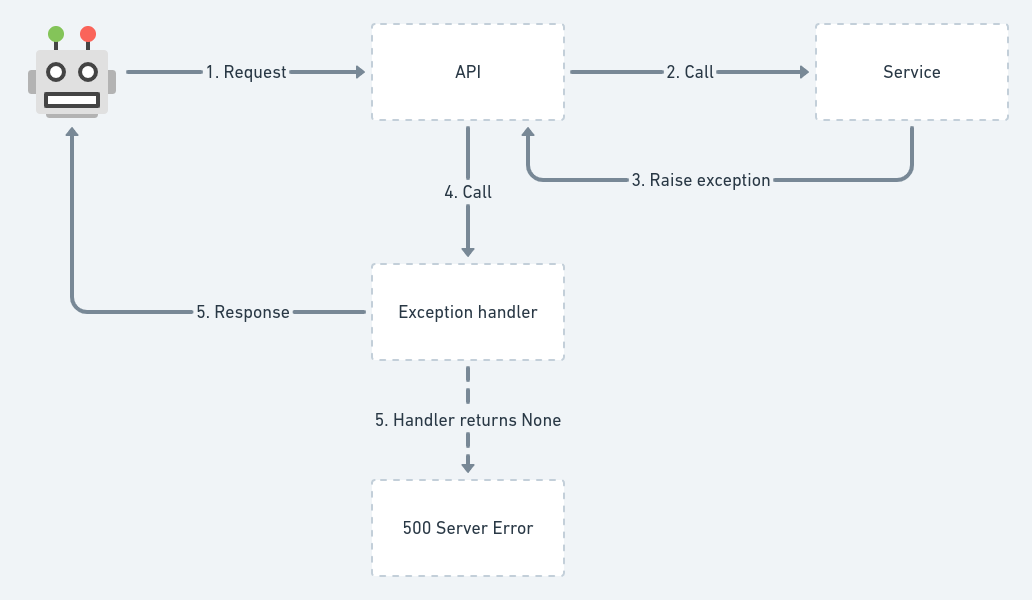

خب، اگر **exception handler نتونه exception مورد نظر رو هندل کنه** و `None` برگردونه،
این باعث می‌شه که یه **Unhandled Exception** رخ بده و نتیجه‌ش **500 Server Error** باشه 😬

این معمولاً خوبه، چون حداقل **خطاها رو سایلنس نمی‌کنه** و مجبور می‌شی بهشون توجه کنی.

---

حالا، چند **quirk و نکته ریز** هست که باید مراقبش باشیم:

#  DRF's ValidationError

مثلاً، اگر ساده یه `rest_framework.exceptions.ValidationError` پر کنیم مثل این:

```python
from rest_framework.exceptions import ValidationError

raise ValidationError("این یک خطای ولیدیشن ساده است")


In [ ]:
from rest_framework import exceptions


def some_service():
    raise exceptions.ValidationError("Some message")

 محتوای پاسخ قراره یه چی شبیه به این بشه

In [ ]:
["Some message"]

 و اگه اینجوری بنویسیمش

In [ ]:
from rest_framework import exceptions


def some_service():
    raise exceptions.ValidationError({"error": "Some message"})

 جوابش قراره این شکلی باشه

In [ ]:
{
  "error": "Some message"
}

 این همون `detail` هست که تحویل `validation error` دادیم ولی با نوع داده متفاوت

و حالا یخوایم از استثناعات دیکه استقاده کنیم مثل نمونه های داخل خود DRF

In [ ]:
from rest_framework import exceptions


def some_service():
    raise exceptions.NotFound()

 نمونه جواب  قراره شبیه به این بشه

In [ ]:
{
  "detail": "Not found."
}

این کاملا با چیزی که از رفتار ValidationError دیدیم فرق داره و می‌تونه مشکلاتی ایجاد کنه.

تا الان، رفتار پیش‌فرض DRF می‌تونه برامون تولید کنه:

- یه آرایه.
- یه دیکشنری.
- یه نتیجه خاص به شکل {"detail": "something"}.

پس اگه بخوایم از رفتار پیش‌فرض DRF استفاده کنیم، باید حواسمون به این ناسازگاری باشه.


### ValidationError خود Django

حالا، رفتار پیش‌فرض DRF با ValidationError خود Django زیاد خوش‌اخلاق نیست.

این قطعه کد:


In [ ]:
from django.core.exceptions import ValidationError as DjangoValidationError


def some_service():
    raise DjangoValidationError("Some error message")

این باعث می‌شه یه استثنا بدون هندل شدن رخ بده و یه خطای ۵۰۰ سرور بدیم.

همین اتفاق وقتی می‌افته که این ValidationError از اعتبارسنجی مدل اومده باشه، مثلا:


In [ ]:
def some_service():
    user = BaseUser()
    user.full_clean()  # Throws ValidationError
    user.save()

این هم باعث می‌شه ۵۰۰ سرور بده.

اگه بخوایم شروع کنیم به هندل کردنش، مثل rest_framework.exceptions.ValidationError، باید یه exception handler سفارشی خودمون بسازیم:


In [ ]:
from django.core.exceptions import ValidationError as DjangoValidationError

from rest_framework.views import exception_handler
from rest_framework.serializers import as_serializer_error
from rest_framework import exceptions


def custom_exception_handler(exc, ctx):
    if isinstance(exc, DjangoValidationError):
        exc = exceptions.ValidationError(as_serializer_error(exc))

    response = exception_handler(exc, ctx)

    # If unexpected error occurs (server error, etc.)
    if response is None:
        return response

    return response

این عملاً پیاده‌سازی پیش‌فرضه، با اضافه شدن این قطعه کد:


In [ ]:
if isinstance(exc, DjangoValidationError):
    exc = exceptions.ValidationError(as_serializer_error(exc))

چون ما باید بین `django.core.exceptions.ValidationError` و `rest_framework.exceptions.ValidationError` نگاشت انجام بدیم، داریم از `as_serializer_error` خود DRF استفاده می‌کنیم، که توی serializerها هم داخلی استفاده می‌شه، فقط برای همین کار.

با این کار، حالا می‌تونیم ValidationError خود Django رو خوش‌رفتار کنیم و با exception handler خود DRF کار کنه.


# توصیف کنید که خطاهای API شما قراره چه شکلی باشن.
این خیلی مهمه و بهتره هر چه زودتر توی پروژه مشخص بشه.

به زبان ساده یعنی: با هم توافق کنیم که اینترفیس خطاهای APIمون چه شکلیه – وقتی خطایی پیش اومد، خروجی API چه شکلی باشه؟

این خیلی وابسته به پروژه است، می‌تونید از APIهای معروف برای الهام گرفتن استفاده کنید:

- Stripe - [Docs](https://stripe.com/docs/api/errors)

مثلا می‌تونیم تصمیم بگیریم که خطاهای ما اینطوری باشن:

- کد وضعیت 4** و 5** برای انواع مختلف خطاها.
- هر خطا یه دیکشنری باشه با یه کلید `message` که پیام خطا داخلش باشه.


In [ ]:
{
  "message": "Some error message here"
}

خیلی ساده‌ست:

- 400 برای خطاهای اعتبارسنجی (validation errors)
- 401 برای خطاهای احراز هویت (auth errors)
- 403 برای خطاهای دسترسی (permission errors)
- 404 برای خطاهای پیدا نشدن (not found errors)
- 429 برای خطاهای محدودسازی درخواست‌ها (throttling errors)
- 500 برای خطاهای سرور (server errors) – اینو باید مواظب باشیم که هیچ استثنایی که باعث 500 میشه رو ساکت نکنیم و همیشه گزارش بدیم، مثلا تو سرویس‌هایی مثل Sentry

باز هم میگم، این بستگی به پروژه داره و شما می‌تونید تغییرش بدید. برای یکی از رویکردهای خاص، یه پیشنهاد مشابه هم ارائه می‌کنیم.


# تغییر رفتار پیش‌فرض مدیریت خطاها

خب ، این یه بخش مهمه: وقتی که تصمیم می‌گیرید خطاهای API شما چه شکلی باشن، باید بتونید رفتار پیش‌فرض مدیریت خطاها رو تغییر بدید.

تو مثال قبل که درباره **ValidationError در Django** صحبت کردیم، یه نمونه‌ی custom exception handler گذاشتیم که دقیقاً همین کارو می‌کنه.

همچنین، تو بخش‌های بعدی چند مثال دیگه هم داریم که می‌تونید ببینید چطوری می‌شه خطاها رو مدیریت کرد.


# Approach 1: استفاده از استثناهای پیش‌فرض DRF با تغییرات کم

 DRF خودش مدیریت خطاهاش خوبه. ولی یه مشکلی هست: خروجی همیشه consistent نیست.
پس ما یه سری تغییرات کوچیک می‌زنیم تا همه چیز یکدست بشه.

هدفمون اینه که خطاها همیشه یه شکلی شبیه به این باشن:


In [ ]:
{
  "detail": "Some error"
}

 یا

In [ ]:
{
  "detail": ["Some error", "Another error"]
}

 یا

In [ ]:
{
  "detail": { "key": "... some arbitrary nested structure ..." }
}

 به هرحال مطمعن بشو که ما یک دیکچنری با کلید `detail` داریم
به علاوه اون ما میخوایم دجنگو `validation error` رو هم حل بکنیم
برا حل اون مثال کاستوم ما باید این شکلی باشه

In [ ]:
from django.core.exceptions import ValidationError as DjangoValidationError, PermissionDenied
from django.http import Http404

from rest_framework.views import exception_handler
from rest_framework import exceptions
from rest_framework.serializers import as_serializer_error


def drf_default_with_modifications_exception_handler(exc, ctx):
    if isinstance(exc, DjangoValidationError):
        exc = exceptions.ValidationError(as_serializer_error(exc))

    if isinstance(exc, Http404):
        exc = exceptions.NotFound()

    if isinstance(exc, PermissionDenied):
        exc = exceptions.PermissionDenied()

    response = exception_handler(exc, ctx)

    # If unexpected error occurs (server error, etc.)
    if response is None:
        return response

    if isinstance(exc.detail, (list, dict)):
        response.data = {
            "detail": response.data
        }

    return response

خب، ما عملاً یه چیزی شبیه همون exception handler اصلی DRF رو بازسازی می‌کنیم،
تا بعدش بتونیم با APIException درست کار کنیم (مثلاً دنبال `detail` باشیم).

حالا بزنیم یه سری تست‌ها رو اجرا کنیم:


In [ ]:
def some_service():
    raise DjangoValidationError("Some error message")

 جواب

In [ ]:
{
  "detail": {
    "non_field_errors": ["Some error message"]
  }
}

 کد :

In [ ]:
from django.core.exceptions import PermissionDenied

def some_service():
    raise PermissionDenied()

 جواب:

In [ ]:
{
  "detail": "You do not have permission to perform this action."
}

 کد :

In [ ]:
from django.http import Http404

def some_service():
    raise Http404()

 جواب :

In [ ]:
{
  "detail": "Not found."
}

 کد :

In [ ]:
def some_service():
    raise RestValidationError("Some error message")

 جواب :

In [ ]:
{
  "detail": ["Some error message"]
}

 کد :

In [ ]:
def some_service():
    raise RestValidationError(detail={"error": "Some error message"})

 جواب :

In [ ]:
{
  "detail": {
    "error": "Some error message"
  }
}

 کد :

In [ ]:
class NestedSerializer(serializers.Serializer):
    bar = serializers.CharField()


class PlainSerializer(serializers.Serializer):
    foo = serializers.CharField()
    email = serializers.EmailField(min_length=200)

    nested = NestedSerializer()


def some_service():
    serializer = PlainSerializer(data={
        "email": "foo",
        "nested": {}
    })
    serializer.is_valid(raise_exception=True)


 جواب :

In [ ]:
{
  "detail": {
    "foo": ["This field is required."],
    "email": [
      "Ensure this field has at least 200 characters.",
      "Enter a valid email address."
    ],
    "nested": {
      "bar": ["This field is required."]
    }
  }
}

 کد :

In [ ]:
from rest_framework import exceptions


def some_service():
    raise exceptions.Throttled()

 جواب :

In [ ]:
{
  "detail": "Request was throttled."
}

 کد :

In [ ]:
def some_service():
    user = BaseUser()
    user.full_clean()

 جواب :

In [ ]:
{
  "detail": {
    "password": ["This field cannot be blank."],
    "email": ["This field cannot be blank."]
  }
}

## Approach 2 - روش پیشنهادی HackSoft

خب، میخوایم یه روش معرفی کنیم که راحت قابل توسعه باشه و با پروژه شما جور در بیاد.

ایده‌های کلیدی:

- اپلیکیشن شما یه سلسله‌مراتب از استثناها (exceptions) داره که توسط منطق کسب‌وکار پرتاب میشن.
- برای ساده بودن، فرض کنیم فقط یه خطا داریم: `ApplicationError`.
- این خطا تو یه اپ core تعریف میشه، داخل ماژول exceptions، یعنی چیزی شبیه `project.core.exceptions.ApplicationError`.
- بقیه موارد رو بذارید DRF به طور پیش‌فرض هندل کنه.
- `ValidationError` حالا خاصه و قراره متفاوت هندل بشه.
- `ValidationError` فقط باید از serializer یا اعتبارسنجی مدل بیاد.


 قراره یه ساختار به شکل زیر برای ارور ها به وجود بیاریم

In [ ]:
{
  "message": "The error message here",
  "extra": {}
}


کلید اضافه (`extra`) می‌تونه هر دیتایی رو نگه داره — هر چیزی که لازم داریم به فرانت منتقل بشه.
برای مثال، وقتی با یه `ValidationError` سروکار داریم (که معمولاً از یه **Serializer** یا **Model** میاد)،
می‌خوایم ارور رو به این شکل نمایش بدیم:


In [ ]:
{
  "message": "Validation error.",
  "extra": {
    "fields": {
      "password": ["This field cannot be blank."],
      "email": ["This field cannot be blank."]
    }
  }
}


اینجا هدف اینه که فرانت‌اند بتونه بفهمه کدوم فیلدها خطا دارن،
مثلاً از طریق `extra.fields` تا بتونه ارور هر فیلد رو جدا جدا به کاربر نشون بده.

برای رسیدن به این هدف، یه **exception handler سفارشی** می‌سازیم.
کدی شبیه به این:

In [ ]:
from django.core.exceptions import ValidationError as DjangoValidationError, PermissionDenied
from django.http import Http404

from rest_framework.views import exception_handler
from rest_framework import exceptions
from rest_framework.serializers import as_serializer_error
from rest_framework.response import Response

from styleguide_example.core.exceptions import ApplicationError


def hacksoft_proposed_exception_handler(exc, ctx):
    """
    {
        "message": "Error message",
        "extra": {}
    }
    """
    if isinstance(exc, DjangoValidationError):
        exc = exceptions.ValidationError(as_serializer_error(exc))

    if isinstance(exc, Http404):
        exc = exceptions.NotFound()

    if isinstance(exc, PermissionDenied):
        exc = exceptions.PermissionDenied()

    response = exception_handler(exc, ctx)

    # If unexpected error occurs (server error, etc.)
    if response is None:
        if isinstance(exc, ApplicationError):
            data = {
                "message": exc.message,
                "extra": exc.extra
            }
            return Response(data, status=400)

        return response

    if isinstance(exc.detail, (list, dict)):
        response.data = {
            "detail": response.data
        }

    if isinstance(exc, exceptions.ValidationError):
        response.data["message"] = "Validation error"
        response.data["extra"] = {
            "fields": response.data["detail"]
        }
    else:
        response.data["message"] = response.data["detail"]
        response.data["extra"] = {}

    del response.data["detail"]

    return response

 استراتژی ما اینجا استفاده کردن از DRF تا جای ممکن و تغییر اونه

In [ ]:
from styleguide_example.core.exceptions import ApplicationError


def trigger_application_error():
    raise ApplicationError(message="Something is not correct", extra={"type": "RANDOM"})

 جواب :

In [ ]:
{
  "message": "Something is not correct",
  "extra": {
    "type": "RANDOM"
  }
}

In [ ]:
def some_service():
    raise DjangoValidationError("Some error message")

In [ ]:
{
  "message": "Validation error",
  "extra": {
    "fields": {
      "non_field_errors": ["Some error message"]
    }
  }
}

In [ ]:
from django.core.exceptions import PermissionDenied

def some_service():
    raise PermissionDenied()

In [ ]:
{
  "message": "You do not have permission to perform this action.",
  "extra": {}
}

In [ ]:
from django.http import Http404

def some_service():
    raise Http404()

In [ ]:
{
  "message": "Not found.",
  "extra": {}
}

In [ ]:
def some_service():
    raise RestValidationError("Some error message")

In [ ]:
{
  "message": "Validation error",
  "extra": {
    "fields": ["Some error message"]
  }
}

In [ ]:
def some_service():
    raise RestValidationError(detail={"error": "Some error message"})

In [ ]:
{
  "message": "Validation error",
  "extra": {
    "fields": {
      "error": "Some error message"
    }
  }
}

In [ ]:
class NestedSerializer(serializers.Serializer):
    bar = serializers.CharField()


class PlainSerializer(serializers.Serializer):
    foo = serializers.CharField()
    email = serializers.EmailField(min_length=200)

    nested = NestedSerializer()


def some_service():
    serializer = PlainSerializer(data={
        "email": "foo",
        "nested": {}
    })
    serializer.is_valid(raise_exception=True)


In [ ]:
{
  "message": "Validation error",
  "extra": {
    "fields": {
      "foo": ["This field is required."],
      "email": [
        "Ensure this field has at least 200 characters.",
        "Enter a valid email address."
      ],
      "nested": {
        "bar": ["This field is required."]
      }
    }
  }
}

In [ ]:
from rest_framework import exceptions


def some_service():
    raise exceptions.Throttled()

In [ ]:
{
  "message": "Request was throttled.",
  "extra": {}
}

In [ ]:
def some_service():
    user = BaseUser()
    user.full_clean()

In [ ]:
{
  "message": "Validation error",
  "extra": {
    "fields": {
      "password": ["This field cannot be blank."],
      "email": ["This field cannot be blank."]
    }
  }
}

#  Celery — مغز پشت صحنه‌ی پروژه

---

##  کاربردهای اصلی

سلری رو معمولاً واسه ۳ مدل کار استفاده می‌کنیم:

1.  حرف زدن با سرویس‌های خارجی (ایمیل، نوتیف، پیام و از این داستانا)
2.  انداختن کارای سنگین بیرون از چرخه‌ی HTTP (تا یوزر منتظر نمونه)
3.  اجرای کارای زمان‌بندی‌شده با **Celery Beat**

---

##  منطق کلی

ما با **Celery** مثل یه رابط رفتار می‌کنیم، نه یه جای منطق اصلی.
یعنی چی؟ یعنی:

> هیچ کاری که مربوط به منطق پروژه‌ست نباید مستقیم داخل تسک نوشته بشه.

سلری فقط یه مجریه. منطق اصلی باید توی سرویس‌ها (services) نوشته بشه، نه تو تسک‌ها.




In [ ]:
from django.db import transaction
from django.core.mail import EmailMultiAlternatives

from styleguide_example.core.exceptions import ApplicationError
from styleguide_example.common.services import model_update
from styleguide_example.emails.models import Email


@transaction.atomic
def email_send(email: Email) -> Email:
    if email.status != Email.Status.SENDING:
        raise ApplicationError(f"Cannot send non-ready emails. Current status is {email.status}")

    subject = email.subject
    from_email = "styleguide-example@hacksoft.io"
    to = email.to

    html = email.html
    plain_text = email.plain_text

    msg = EmailMultiAlternatives(subject, plain_text, from_email, [to])
    msg.attach_alternative(html, "text/html")

    msg.send()

    email, _ = model_update(
        instance=email,
        fields=["status", "sent_at"],
        data={
            "status": Email.Status.SENT,
            "sent_at": timezone.now()
        }
    )
    return email

 ارسال ایمیل لاجیک بیزینسی داره ولی ما میخوایم این رو با سلری تسک انجام بدیم و یک سرویس رو تریگر کنیم

In [ ]:
from celery import shared_task

from styleguide_example.emails.models import Email


@shared_task
def email_send(email_id):
    email = Email.objects.get(id=email_id)

    from styleguide_example.emails.services import email_send
    email_send(email)

همون‌طور که می‌بینی، ما با **تسک (task)** مثل یه **API** برخورد می‌کنیم:

1. داده‌های لازم رو می‌گیریم.
2. سرویس مورد نظر رو صدا می‌زنیم.

---

حالا تصور کن یه **سرویس دیگه** داریم که خودش قراره **ارسال ایمیل** رو فعال کنه.
کدش ممکنه شبیه این باشه:

In [ ]:
from django.db import transaction

# ... more imports here ...

from styleguide_example.emails.tasks import email_send as email_send_task


@transaction.atomic
def user_complete_onboarding(user: User) -> User:
    # ... some code here

    email = email_get_onboarding_template(user=user)

    transaction.on_commit(lambda: email_send_task.delay(email.id))

    return user


1. ما تسک (task) رو که **اسمش دقیقاً مثل سرویسه** ایمپورت می‌کنیم،
   ولی یه پسوند `_task` بهش اضافه می‌کنیم تا از هم تفکیک بشن.

2. وقتی **تراکنش (transaction)** تموم می‌شه (commit می‌کنه)،
   اون موقع تسک رو صدا می‌زنیم.

---

###  در کل، طرز کار ما با Celery به این شکله:

- **تسک‌ها سرویس‌ها رو صدا می‌زنن.**
- **سرویس** رو داخل بدنه‌ی تابع تسک ایمپورت می‌کنیم (نه در بالای فایل).
- **وقتی می‌خوایم یه تسک رو اجرا کنیم،** اون رو در سطح ماژول ایمپورت می‌کنیم و بهش پسوند `_task` می‌دیم.
- **تسک‌ها رو بعد از commit تراکنش اجرا می‌کنیم،** به‌عنوان یه اثر جانبی از منطق اصلی.

---

### نکته‌ی طراحی
این ترکیب بین **tasks و services** باعث می‌شه **دایره‌ی ایمپورت‌ها (circular imports)** اتفاق نیفته،
که یکی از مشکلات رایج موقع استفاده از Celery هست.


##  Error Handling

گاهی وقتا ممکنه **سرویس ما fail کنه**،
و بخوایم اون خطا رو در سطح **تسک (task)** هندل کنیم.
مثلاً بخوایم **تسک رو دوباره retry کنیم**.

اینجور منطق مربوط به خطا **باید داخل خود تسک نوشته بشه**،
نه داخل سرویس.


In [ ]:
from celery import shared_task
from celery.utils.log import get_task_logger

from styleguide_example.emails.models import Email


logger = get_task_logger(__name__)


def _email_send_failure(self, exc, task_id, args, kwargs, einfo):
    email_id = args[0]
    email = Email.objects.get(id=email_id)

    from styleguide_example.emails.services import email_failed

    email_failed(email)


@shared_task(bind=True, on_failure=_email_send_failure)
def email_send(self, email_id):
    email = Email.objects.get(id=email_id)

    from styleguide_example.emails.services import email_send

    try:
        email_send(email)
    except Exception as exc:
        # https://docs.celeryq.dev/en/stable/userguide/tasks.html#retrying
        logger.warning(f"Exception occurred while sending email: {exc}")
        self.retry(exc=exc, countdown=5)

##  Handling Failure

همونطور که می‌بینی، تسک چند بار **retry** می‌کنه،
ولی اگه **همه‌ی تلاش‌ها fail بشن**، ما این وضعیت رو
در **callback مخصوص شکست (on_failure)** هندل می‌کنیم.

---

###  منطقش اینجوریه:
اسم callback بر اساس یه الگو ساخته می‌شه
> `_ {task_name}_failure`

و این تابع هم مثل یه تسک معمولی،
**سرویس مربوطه رو صدا می‌زنه** (service layer).

---

### مثال ساده:

```python
from celery import shared_task
from styleguide_example.emails.models import Email

@shared_task(bind=True, autoretry_for=(Exception,), retry_backoff=True, max_retries=5)
def email_send(self, email_id):
    try:
        email = Email.objects.get(id=email_id)
        from styleguide_example.emails.services import email_send
        email_send(email)
    except Exception as exc:
        raise self.retry(exc=exc)


@shared_task
def email_send_failure(email_id):
    # اینجا منطق مربوط به fail شدن رو هندل می‌کنیم
    email = Email.objects.get(id=email_id)
    from styleguide_example.emails.services import email_mark_failed
    email_mark_failed(email)


##  Structure — ساختار تسک‌ها

تسک‌ها معمولا توی **tasks.py** هر اپ قرار می‌گیرن.

قوانین همون قوانین بقیه چیزها هستن (APIs, services, selectors):
اگه تعداد تسک‌ها برای یه اپ زیاد شد، بهتره اون‌ها رو **بر اساس domain جدا کنیم**.

مثلا:
- `tasks/domain_a.py`
- `tasks/domain_b.py`

و کافیه اونا رو توی `tasks/__init__.py` ایمپورت کنیم تا **Celery autodiscover** انجام بده.

 نکته‌ی کلی: تسک‌ها رو طوری تقسیم کن که **برای خودت منطقی باشه**.

---

##  Periodic Tasks — تسک‌های دوره‌ای

مدیریت تسک‌های دوره‌ای خیلی مهمه، مخصوصا وقتی **ده‌ها یا صدها تسک** داشته باشی.

ما از ترکیب زیر استفاده می‌کنیم:
- `Celery Beat`
- `django_celery_beat.schedulers:DatabaseScheduler`
- `django-celery-beat`

اضافه بر این، یه **management command** داریم به اسم:
`setup_periodic_tasks`

این کامند **تعریف همه‌ی تسک‌های دوره‌ای سیستم** رو نگه می‌داره و داخل اپ tasks قرار داره.

---

###  مسیر فایل مثال:
`project/tasks/management/commands/setup_periodic_tasks.py`


In [ ]:
from django.core.management.base import BaseCommand
from django.db import transaction

from django_celery_beat.models import IntervalSchedule, CrontabSchedule, PeriodicTask

from project.app.tasks import some_periodic_task


class Command(BaseCommand):
    help = f"""
    Setup celery beat periodic tasks.

    Following tasks will be created:

    - {some_periodic_task.name}
    """

    @transaction.atomic
    def handle(self, *args, **kwargs):
        print('Deleting all periodic tasks and schedules...\n')

        IntervalSchedule.objects.all().delete()
        CrontabSchedule.objects.all().delete()
        PeriodicTask.objects.all().delete()

        periodic_tasks_data = [
            {
                'task': some_periodic_task
                'name': 'Do some peridoic stuff',
                # https://crontab.guru/#15_*_*_*_*
                'cron': {
                    'minute': '15',
                    'hour': '*',
                    'day_of_week': '*',
                    'day_of_month': '*',
                    'month_of_year': '*',
                },
                'enabled': True
            },
        ]

        for periodic_task in periodic_tasks_data:
            print(f'Setting up {periodic_task["task"].name}')

            cron = CrontabSchedule.objects.create(
                **periodic_task['cron']
            )

            PeriodicTask.objects.create(
                name=periodic_task['name'],
                task=periodic_task['task'].name,
                crontab=cron,
                enabled=periodic_task['enabled']
            )

---

#  جمع‌بندی

این استایل‌گاید قرار نیست یه قانون خشک باشه،
بلکه قراره بهت کمک کنه که **کدهایی بنویسی که خودت ازش لذت ببری.**

دنیا پر از فریم‌ورک‌ها و ابزارهای مختلفه،
اما در نهایت چیزی که یه پروژه رو ماندگار می‌کنه
**طرز فکر و نظم ذهنی توسعه‌دهنده‌هاشه.**

اگر این ساختار رو تو پروژه‌هات پیاده کنی،
هم کار گروهی راحت‌تر میشه، هم رفع باگ‌ها و توسعه‌های بعدی تبدیل میشه به یه بازی

پس اینو به عنوان یه «نقشه راه شخصی» برای جنگو در نظر بگیر —
یه سبکی که قراره زندگیتو ساده‌تر کنه، نه سخت‌تر.

موفق باشی ایلیا قادری آبان 404
